Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Read the Dataset

In [ ]:
data = pd.read_csv('Admission_Predict.csv')


 Data Preparation


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data.isnull().any()


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

Exploratory Data Analysis
   Univariate analysis
   

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


 Visual analysis
  Univariate analysis


<ipython-input-14-64e93544a305>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'])


<Axes: xlabel='GRE Score', ylabel='Density'>

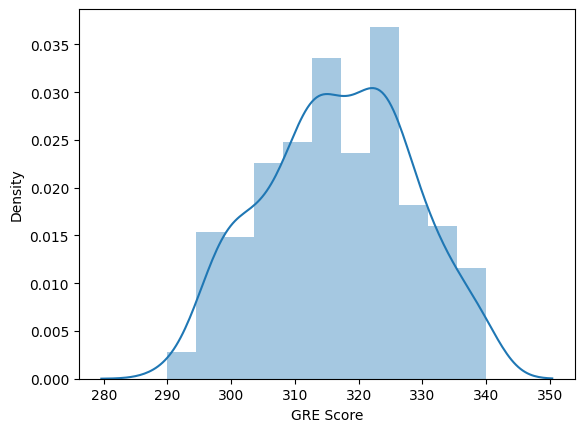

In [ ]:
sns.distplot(data['GRE Score'])

Scatter Plot


<Axes: xlabel='University Rating', ylabel='CGPA'>

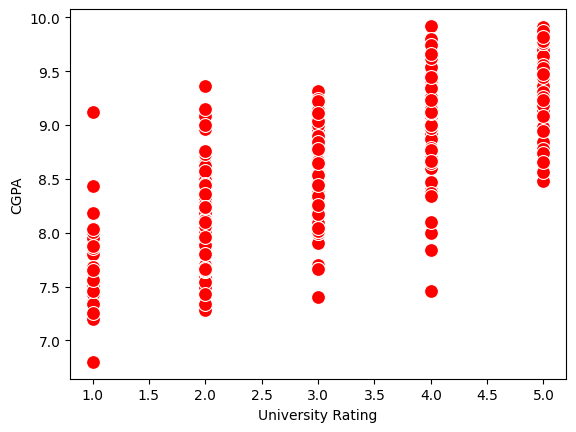

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red',s=100)

KeyError: ignored

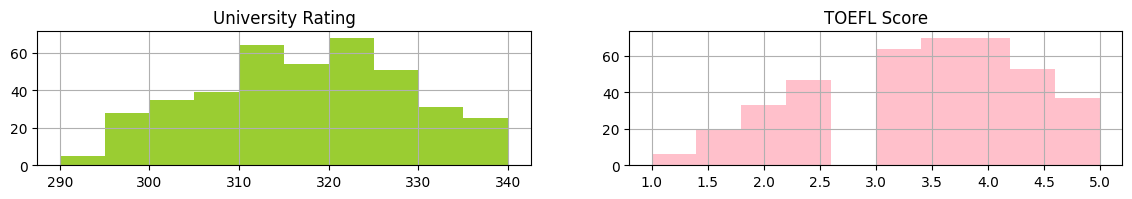

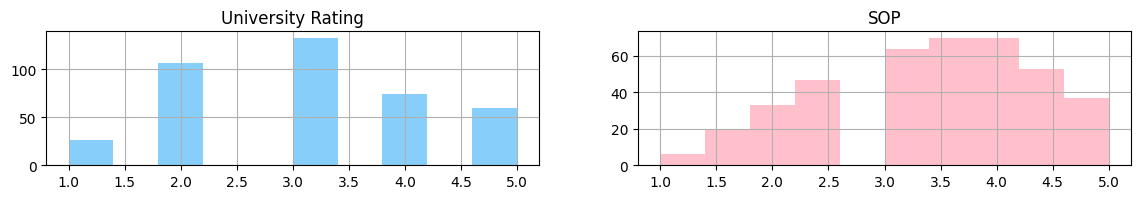

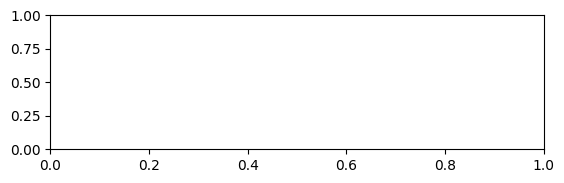

In [ ]:
category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    fig = plt.figure(figsize=(14,8))
    plt.subplot2grid((4,2),(1,0))
    data[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*1])
    plt.subplot2grid((4,2),(1,1))
    data[category[2*1+1]].hist(color=color[2*1+1],bins=10)
    plt.title(category[2*i+1])

plt.subplots_adjust(hspace= 0.7, wspace = 0.2)
plt.show()

## scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x=sc.fit_transform(x)
x

NameError: ignored

Splitting data into x and y


In [ ]:
x=data.iloc[:,0:7].values

In [ ]:
y=data.iloc[:,7:].values
y

array([[1.  , 0.92],
       [1.  , 0.76],
       [1.  , 0.72],
       [1.  , 0.8 ],
       [0.  , 0.65],
       [1.  , 0.9 ],
       [1.  , 0.75],
       [0.  , 0.68],
       [0.  , 0.5 ],
       [0.  , 0.45],
       [1.  , 0.52],
       [1.  , 0.84],
       [1.  , 0.78],
       [1.  , 0.62],
       [1.  , 0.61],
       [0.  , 0.54],
       [0.  , 0.66],
       [1.  , 0.65],
       [0.  , 0.63],
       [0.  , 0.62],
       [1.  , 0.64],
       [0.  , 0.7 ],
       [1.  , 0.94],
       [1.  , 0.95],
       [1.  , 0.97],
       [1.  , 0.94],
       [0.  , 0.76],
       [1.  , 0.44],
       [0.  , 0.46],
       [0.  , 0.54],
       [1.  , 0.65],
       [1.  , 0.74],
       [1.  , 0.91],
       [1.  , 0.9 ],
       [1.  , 0.94],
       [1.  , 0.88],
       [0.  , 0.64],
       [0.  , 0.58],
       [0.  , 0.52],
       [0.  , 0.48],
       [1.  , 0.46],
       [1.  , 0.49],
       [1.  , 0.53],
       [0.  , 0.87],
       [1.  , 0.91],
       [1.  , 0.88],
       [1.  , 0.86],
       [0.  ,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=101)

In [ ]:
y_train=(y_train>0.5)
y_train

array([[ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [ True, False],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False,  True],
       [ True,  True],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [Fal

In [ ]:
y_test=(y_test>0.5)

 Model Building


In [ ]:
from sklearn.linear_model.logistic import LogisticRegression
cls =LogisticRegression(random_state =0)
lr=cls.fit(x_train,y_train)

ModuleNotFoundError: ignored

In [ ]:
y_pred =lr.Predict(x_test)
y_pred

NameError: ignored

ANN Model

In [ ]:
# Libraries to train Neural network import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout from tensorflow.keras.optimizers import Adam

SyntaxError: ignored

In [ ]:
Initialize the model
model=keras.Sequential()

#Add input Layer
model.add(Dense(7, activation 'relu', input_dim=7))

#Add hidden Layers
model.add(Dense(7, activation='relu'))

#Add output layer
model.add(Dense(1,activation="linear"))

model.summary()


SyntaxError: ignored

In [ ]:
modal.summary()

In [ ]:
model.fit(x_train, y_train, batch_size = 28, epochs = 100)

In [ ]:
model.compile(loss="binary_crossentropy,optimizer= "= ['accuracy'])


In [ ]:
model.fit(x_train, y_train, batch_size = 20, epochs = 100)

In [ ]:
from sklearn.metrics import accuracy score

# Make predictions on the training data
train_predictions model.predict(x_train)

print(train_predictions)

In [ ]:
# Get the training accuracy 
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]

print(train_acc)

In [ ]:
# Get the test accuracy
test_acc model.evaluate(x_test, y_test, verbose=0)[1]

print(test_acc)

In [ ]:
pred=model.predict(x_test)
pred = (pred>0.5)
pred

NameError: ignored